Machine Learning Model - Number of stars

# 1. Understand the problem - EDA

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Looking the informtion
df = pd.read_csv("github-repo-data.csv")
df.head()

,Name,Description,URL,Created At,Updated At,Homepage,Size,Stars,Forks,Issues,...,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,Is Archived,Is Template,Default Branch
0,static-land,Specification for common algebraic structures ...,https://github.com/fantasyland/static-land,2016-03-12T18:04:07Z,2023-09-08T17:08:03Z,NaN,120,756,45.0,11,...,True,True,True,True,False,False,False,False,False,master
1,markdown-pdf,:page_facing_up: Markdown to PDF converter,https://github.com/alanshaw/markdown-pdf,2013-05-17T16:29:42Z,2023-09-24T18:31:55Z,https://npmjs.org/package/markdown-pdf,422,2573,258.0,90,...,True,True,True,True,False,False,False,False,False,master
2,pyflow,"Fast, accurate and easy to run dense optical f...",https://github.com/pathak22/pyflow,2016-07-16T04:50:01Z,2023-09-22T02:38:05Z,NaN,899,635,137.0,21,...,True,True,True,True,False,False,False,False,False,master
3,User-loan-risk-prediction,马上AI全球挑战者大赛 rank 1st,https://github.com/chenkkkk/User-loan-risk-pre...,2018-06-08T05:29:31Z,2023-09-24T08:10:38Z,NaN,742,247,103.0,0,...,True,True,True,True,False,False,False,False,False,master
4,Sphero-iOS-SDK,🚫 DEPRECATED: Sphero™ is the amazing robotic b...,https://github.com/sphero-inc/Sphero-iOS-SDK,2011-05-09T05:57:32Z,2023-08-24T22:20:20Z,http://sdk.sphero.com,147126,225,81.0,19,...,True,True,True,True,False,False,False,True,False,master


In [3]:
# Obtengo información de cuántos nulos hay y el tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150520 entries, 0 to 150519
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             150520 non-null  object 
 1   Description      144890 non-null  object 
 2   URL              150520 non-null  object 
 3   Created At       150520 non-null  object 
 4   Updated At       150520 non-null  object 
 5   Homepage         54809 non-null   object 
 6   Size             150520 non-null  int64  
 7   Stars            150520 non-null  int64  
 8   Forks            150518 non-null  float64
 9   Issues           150520 non-null  int64  
 10  Language         139289 non-null  object 
 11  License          113325 non-null  object 
 12  Topics           150520 non-null  object 
 13  Has Issues       150520 non-null  bool   
 14  Has Projects     150520 non-null  bool   
 15  Has Downloads    150520 non-null  bool   
 16  Has Wiki         150520 non-null  bool

In [4]:
# Descriptive statistics
df.describe()

,Size,Stars,Forks,Issues
count,1.505200e+05,150520.000000,150518.000000,150520.000000
mean,5.423895e+04,1117.169313,233.165103,37.626056
std,6.600855e+05,3959.312859,1100.620630,178.576932
min,0.000000e+00,167.000000,-5.000000,0.000000
25%,3.780000e+02,237.000000,39.000000,3.000000
50%,2.396500e+03,378.000000,79.000000,10.000000
75%,1.523425e+04,800.000000,175.000000,28.000000
max,1.048802e+08,298393.000000,142778.000000,20875.000000


In [5]:
# See each type. 
df.dtypes

Name                object
Description         object
URL                 object
Created At          object
Updated At          object
Homepage            object
Size                 int64
Stars                int64
Forks              float64
Issues               int64
Language            object
License             object
Topics              object
Has Issues            bool
Has Projects          bool
Has Downloads         bool
Has Wiki              bool
Has Pages             bool
Has Discussions       bool
Is Fork               bool
Is Archived           bool
Is Template           bool
Default Branch      object
dtype: object

Should be int:
- Size
- Stars
- Forks
- Issues
Shuld be datetime:
- Created At
- Upodated At
Should be boolean:
- Has Issues
- Has Projects
- Has Downloads
- Has Wiki
- Has Pages
- Has Discussions
- Is Fork
- Is Archived
- Is Template


In [6]:
df.shape

(150520, 23)

In [7]:
# Summary of categorical variables
print(df.select_dtypes(include='object').nunique())

Name              140071
Description       144418
URL               150520
Created At        150473
Updated At        138966
Homepage           52447
Language             341
License               43
Topics             77538
Default Branch      1730
dtype: int64


In [8]:
# Missing values
print(df.isnull().sum())

Name                   0
Description         5630
URL                    0
Created At             0
Updated At             0
Homepage           95711
Size                   0
Stars                  0
Forks                  2
Issues                 0
Language           11231
License            37195
Topics                 0
Has Issues             0
Has Projects           0
Has Downloads          0
Has Wiki               0
Has Pages              0
Has Discussions        0
Is Fork                0
Is Archived            0
Is Template            0
Default Branch         0
dtype: int64


Description (5,630 missing)
Importance: Low. The Description is a textual summary that might not directly influence the prediction of Stars.
Recommendation: Replace missing values with "No description" or drop the column if it’s not useful after exploratory analysis.

Homepage (95,711 missing)
Importance: Very low. The Homepage provides additional information about the project but is unlikely to affect the Stars count.
Recommendation: Drop the column, as the missing rate is very high and it’s not critical for predicting repository popularity.

Language (11,231 missing)
Importance: High. The programming language is likely a significant predictor of repository popularity (Stars).
Recommendation: Replace missing values with "Unknown" or analyze whether the missing values are distributed in a meaningful pattern (e.g., repositories without a specified language).

License (37,195 missing)
Importance: Medium. The license might influence popularity depending on the audience or use case (e.g., open-source repositories might receive more stars).
Recommendation: Replace missing values with "Unknown License". You can also investigate if missing licenses are concentrated in certain repository types.

Forks (2 missing)
Importance: High. The number of forks is a direct measure of a repository's popularity.
Recommendation: Replace missing values with the median or mean of the column, as the number of missing values is very small.

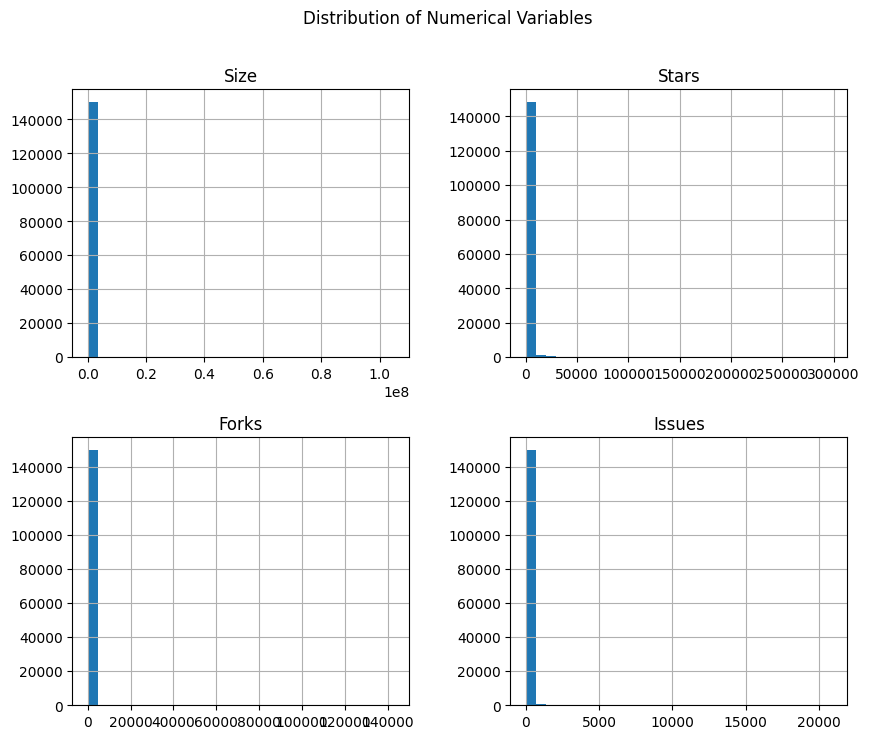

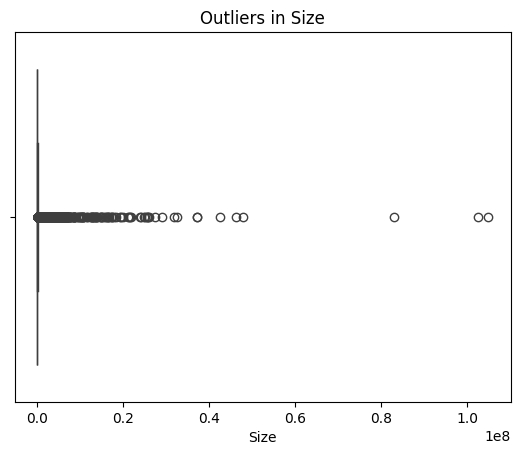

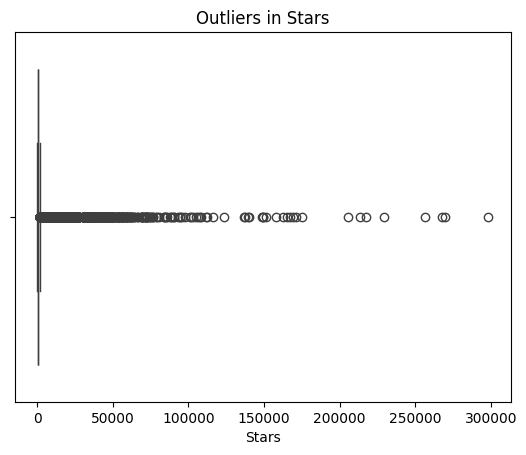

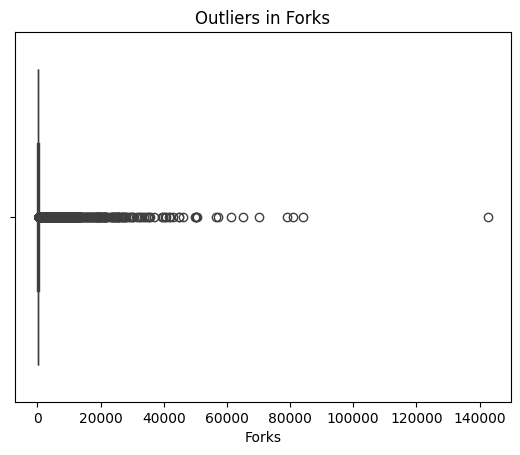

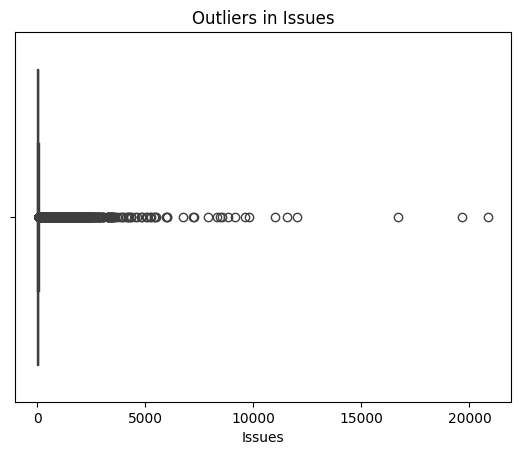

In [9]:
# Histograms to check distributions
num_cols = ['Size', 'Stars', 'Forks', 'Issues']
df[num_cols].hist(bins=30, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Variables')
plt.show()

# Boxplots to detect outliers
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()

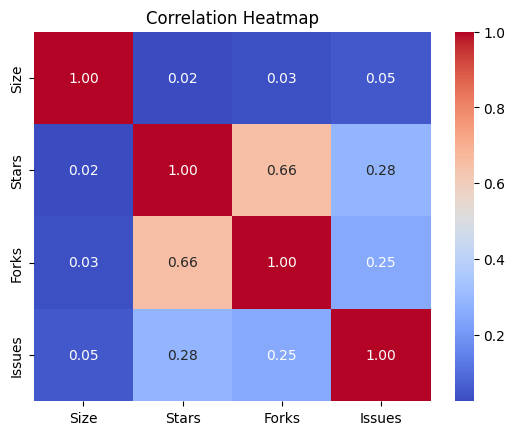

In [10]:
# Correlation heatmap
corr_matrix = df[['Size', 'Stars', 'Forks', 'Issues']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Relationship Between Stars and Other Numerical Variables
Examine how Stars relate to other numerical variables.

In [11]:
# # Pairplot
# sns.pairplot(df, vars=['Stars', 'Size', 'Forks', 'Issues'])
# plt.suptitle('Relationships Between Stars and Numerical Variables', y=1.02)
# plt.show()


Relationship Between Stars and Categorical Variables
Analyze how categorical variables impact popularity.

C:\Users\solange.moreyra\AppData\Local\Temp\ipykernel_4196\3344901373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_languages.values, y=top_languages.index, palette='viridis')


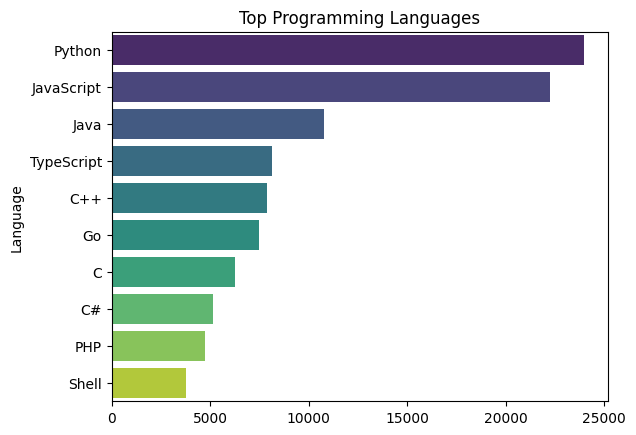

C:\Users\solange.moreyra\AppData\Local\Temp\ipykernel_4196\3344901373.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_licenses.values, y=top_licenses.index, palette='magma')


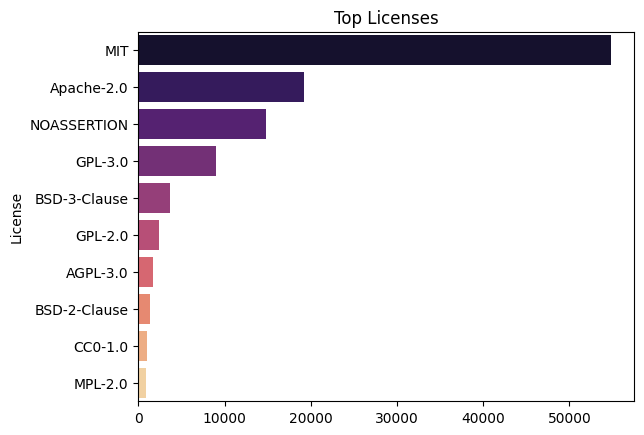

In [12]:
# Most common languages
top_languages = df['Language'].value_counts().head(10)
sns.barplot(x=top_languages.values, y=top_languages.index, palette='viridis')
plt.title('Top Programming Languages')
plt.show()

# Most common licenses
top_licenses = df['License'].value_counts().head(10)
sns.barplot(x=top_licenses.values, y=top_licenses.index, palette='magma')
plt.title('Top Licenses')
plt.show()

Analyze how features like Has Issues, Has Projects, etc., influence Stars.

In [13]:
# # Stars by Boolean Features
# boolean_cols = ['Has Issues', 'Has Projects', 'Has Downloads', 'Has Wiki', 
#                 'Has Pages', 'Has Discussions', 'Is Fork', 'Is Archived', 'Is Template']

# for col in boolean_cols:
#     sns.boxplot(data=df, x=col, y='Stars')
#     plt.title(f'Distribution of Stars by {col}')
#     plt.show()


# 2. Handling Outliers and missing values

In [14]:
# Filling missing categorical variables with the mode
df['Description'] = df['Description'].fillna(df['Description'].mode()[0])
df['Homepage'] = df['Homepage'].fillna('No homepage')  # or use 'Unknown'
df['Language'] = df['Language'].fillna(df['Language'].mode()[0])
df['License'] = df['License'].fillna('No License')  # or mode
df['Topics'] = df['Topics'].fillna('No Topics')  # or mode

# Handle numerical columns with missing values (Size, Stars, Forks, Issues)
# If Forks has missing values (2 missing), fill with median or 0 if appropriate
df['Forks'] = df['Forks'].fillna(df['Forks'].median())

# Checking if there are still missing values
print(df.isnull().sum())

Name               0
Description        0
URL                0
Created At         0
Updated At         0
Homepage           0
Size               0
Stars              0
Forks              0
Issues             0
Language           0
License            0
Topics             0
Has Issues         0
Has Projects       0
Has Downloads      0
Has Wiki           0
Has Pages          0
Has Discussions    0
Is Fork            0
Is Archived        0
Is Template        0
Default Branch     0
dtype: int64


Identify with IQR (Interquartile Range) and optionally remove outliers to reduce skewness.

In [15]:
# Calculating the IQR
Q1 = df[['Size', 'Stars', 'Forks', 'Issues']].quantile(0.25)
Q3 = df[['Size', 'Stars', 'Forks', 'Issues']].quantile(0.75)
IQR = Q3 - Q1

# Identifying the outliers
outliers = (df[['Size', 'Stars', 'Forks', 'Issues']] < (Q1 - 1.5 * IQR)) | \
           (df[['Size', 'Stars', 'Forks', 'Issues']] > (Q3 + 1.5 * IQR))

# Counting outliers
outlier_counts = outliers.sum()
print(outlier_counts)

Size      23077
Stars     18825
Forks     16609
Issues    17228
dtype: int64


In [16]:
# Function to detect and cap outliers using IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the function to the numeric columns
# Prevent model bias
# Improve model performance
df = cap_outliers(df, 'Size')
df = cap_outliers(df, 'Stars')
df = cap_outliers(df, 'Forks')
df = cap_outliers(df, 'Issues')

# Checking the results
df[['Size', 'Stars', 'Forks', 'Issues']].describe()


,Size,Stars,Forks,Issues
count,150520.000000,150520.000000,150520.000000,150520.000000
mean,10100.707335,606.453245,126.701222,19.237842
std,13769.176775,497.015603,117.517946,21.782073
min,0.000000,167.000000,-5.000000,0.000000
25%,378.000000,237.000000,39.000000,3.000000
50%,2396.500000,378.000000,79.000000,10.000000
75%,15234.250000,800.000000,175.000000,28.000000
max,37518.625000,1644.500000,379.000000,65.500000


IQR (Interquartile Range): Outliers are typically defined as values that fall outside the range of 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3).

# 3. Feature Engineering

New features that can improve the predictive model:
- Age of the repository
- Time since last update

In [17]:
# # Convert date columns to datetime
# df['Created At'] = pd.to_datetime(df['Created At'])
# df['Updated At'] = pd.to_datetime(df['Updated At'])

# # Create new features for the repository age and time since last update
# df['Repository Age (Days)'] = (df['Updated At'] - df['Created At']).dt.days
# df['Time Since Last Update (Days)'] = (pd.Timestamp.now() - df['Updated At']).dt.days

For variables like Language, License, and Topics, you may want to use one-hot encoding or label encoding (represent categorical variables as binary vectors)

In [18]:
# Encode categorical variables using one-hot encoding for 'Language', 'License', and 'Topics'
df = pd.get_dummies(df, columns=['Language', 'License'], drop_first=True)

For text-based features like Description, we could apply TF-IDF (Term Frequency-Inverse Document Frequency)

In [19]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Apply TF-IDF for 'Description' (optional based on analysis needs)
# vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
# X_desc = vectorizer.fit_transform(df['Description'])

# # Adding the vectorized features to the dataframe (you can join them later as needed)
# desc_df = pd.DataFrame(X_desc.toarray(), columns=vectorizer.get_feature_names_out())
# df = pd.concat([df, desc_df], axis=1)

Applyting log transformation because the distribution seem skewed

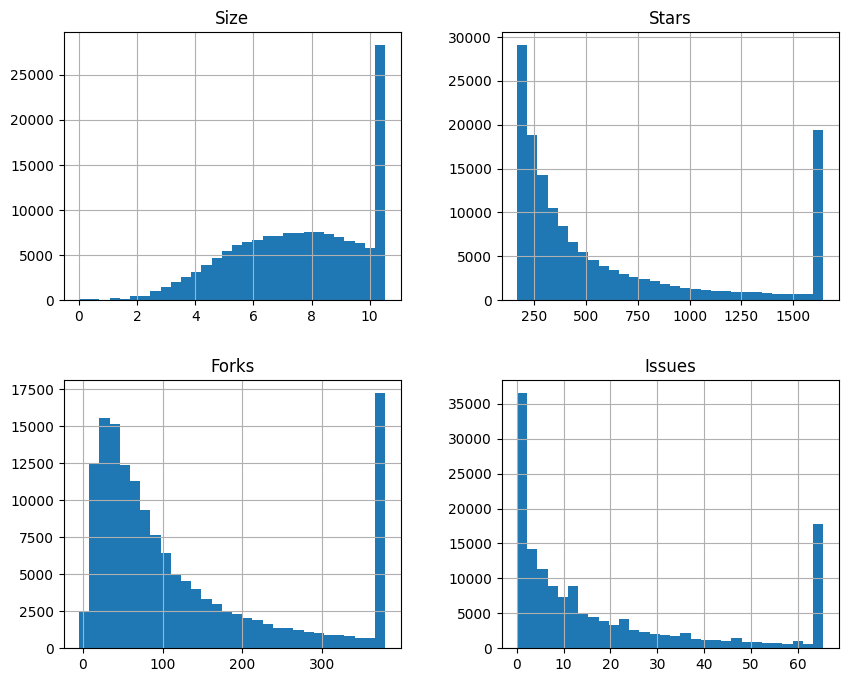

In [20]:
# Apply log transformation for 'Size'
df['Size'] = np.log1p(df['Size'])  # log(1 + x) to handle zeros

# Visualize transformed data
df[['Size', 'Stars', 'Forks', 'Issues']].hist(bins=30, figsize=(10, 8))
plt.show()

# 4. Model Selection

Building the Prediction Model
Next, we'll build a prediction model using Random Forest for the variable Stars (or any other numerical variable of interest).

Splitting the DataFrame into Features (X) and Target Variable (y)

Need to have all the variables in numeric variables 

In [21]:
# Summary of categorical variables
print(df.select_dtypes(include='object').nunique())

Name              140071
Description       144418
URL               150520
Created At        150473
Updated At        138966
Homepage           52448
Topics             77538
Default Branch      1730
dtype: int64


In [22]:
# Feature variables
X = df.drop(columns=['Stars', 'Name', 'URL', 'Created At', 'Updated At', 'Homepage', 'Topics', 'Default Branch', 'Description'])

# Target variable
y = df['Stars']

In [23]:
X.head()

,Size,Forks,Issues,Has Issues,Has Projects,Has Downloads,Has Wiki,Has Pages,Has Discussions,Is Fork,...,License_No License,License_ODbL-1.0,License_OFL-1.1,License_OSL-3.0,License_PostgreSQL,License_UPL-1.0,License_Unlicense,License_Vim,License_WTFPL,License_Zlib
0,4.795791,45.0,11.0,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,6.047372,258.0,65.5,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,6.802395,137.0,21.0,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,6.610696,103.0,0.0,True,True,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,10.532619,81.0,19.0,True,True,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [24]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest does not require feature standardization or normalization. This is because Random Forest, being a tree-based algorithm, is not sensitive to the scale of the features

In this case, Random Forest is a good choice for the following reasons, based on the checklist for model selection:

Supervised Learning: Since the target variable (Stars) is a continuous numeric value, this problem falls under supervised learning. Random Forest is well-suited for supervised learning tasks.

Regression: This problem is a regression problem because we are trying to predict a numerical value (Stars), not a category. Random Forest Regression is commonly used for predicting continuous values.

Handling Complex Data: Random Forest is effective for handling datasets with many variables (like Size, Forks, Issues, etc.), including both numerical and categorical features. It can manage relationships and interactions between variables without the need for complex feature engineering.

Dealing with Missing Values: Random Forest can handle missing data and is less sensitive to outliers, making it a good choice when working with data that might have missing values or outliers.

Non-Linearity: Random Forest doesn't assume a linear relationship between the independent variables and the target variable. It can capture complex non-linear relationships, which is useful in this case where the correlation with Stars is not necessarily linear (e.g., Size has a very low correlation of 0.02, and Issues has a very low correlation of 0.05).

Interpretability: Random Forest provides feature importance, which helps to understand which variables contribute the most to predicting Stars, allowing for some interpretability in the model.

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # For regression tasks

rf_model = RandomForestRegressor(random_state=42)  # Or RandomForestClassifier

# 5. Model Training

In [26]:
rf_model.fit(X_train, y_train)

: 

# 6. Model Predictions

In [ ]:
y_pred = rf_model.predict(X_test)

# 7. Model Evaluation